Question 1 - Comparing Accuracy of Cifar10 CNN to simple dense NN

In [15]:
# import libaries
import torch
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

from __future__ import print_function
import os

import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from keras.optimizers import legacy



In [4]:
# Load data, set parameters

batch_size = 512
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
# Generate model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [6]:
# train model

# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# train model using RMSprop
model.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
  print('Not using data augmentation.')
  model.fit(x_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(x_test, y_test),
      shuffle=True)
else:
  print('Using real-time data augmentation.')
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by dataset std
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
  model_fit = model.fit_generator(datagen.flow(x_train, y_train,
                  batch_size=batch_size),
            epochs=epochs,
            validation_data=(x_test, y_test),
            workers=4)

Using real-time data augmentation.


<ipython-input-6-b6bd3efba54c>:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_fit = model.fit_generator(datagen.flow(x_train, y_train,


Epoch 1/10
98/98 [==============================] - 287s 3s/step - loss: 2.1454 - accuracy: 0.2021 - val_loss: 1.9983 - val_accuracy: 0.2892
Epoch 2/10
98/98 [==============================] - 270s 3s/step - loss: 1.9338 - accuracy: 0.2979 - val_loss: 1.7941 - val_accuracy: 0.3751
Epoch 3/10
98/98 [==============================] - 302s 3s/step - loss: 1.8194 - accuracy: 0.3427 - val_loss: 1.6836 - val_accuracy: 0.4056
Epoch 4/10
98/98 [==============================] - 262s 3s/step - loss: 1.7486 - accuracy: 0.3677 - val_loss: 1.7262 - val_accuracy: 0.3857
Epoch 5/10
98/98 [==============================] - 252s 3s/step - loss: 1.7024 - accuracy: 0.3840 - val_loss: 1.5631 - val_accuracy: 0.4441
Epoch 6/10
98/98 [==============================] - 262s 3s/step - loss: 1.6580 - accuracy: 0.3958 - val_loss: 1.5805 - val_accuracy: 0.4349
Epoch 7/10
98/98 [==============================] - 252s 3s/step - loss: 1.6244 - accuracy: 0.4119 - val_loss: 1.4878 - val_accuracy: 0.4737
Epoch 8/10
98

In [7]:
# save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
# trained model scores
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 14s 44ms/step - loss: 1.4306 - accuracy: 0.4905
Test loss: 1.4305899143218994
Test accuracy: 0.49050000309944153


In [20]:
# Define a function to create and train dense neural networks
def dense_nn(hidden_layers, num_units, dropout_rate):
    model = Sequential()
    model.add(Flatten(input_shape=x_train.shape[1:]))
    for _ in range(hidden_layers):
        model.add(Dense(num_units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = legacy.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=None, decay=0.0)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        shuffle=True,
                        verbose=0)  # Set verbose to 0 to suppress training output
    return model, history

In [21]:
# Define the number of hidden layers and units for the dense networks
hidden_layers_list = [0, 1, 2, 3, 4]
num_units = 512
dropout_rate = 0.5

In [22]:
# Create a list to store models and histories
models = []
histories = []

# Create and train models for each configuration
for hidden_layers in hidden_layers_list:
    model, history = dense_nn(hidden_layers, num_units, dropout_rate)
    models.append(model)
    histories.append(history)


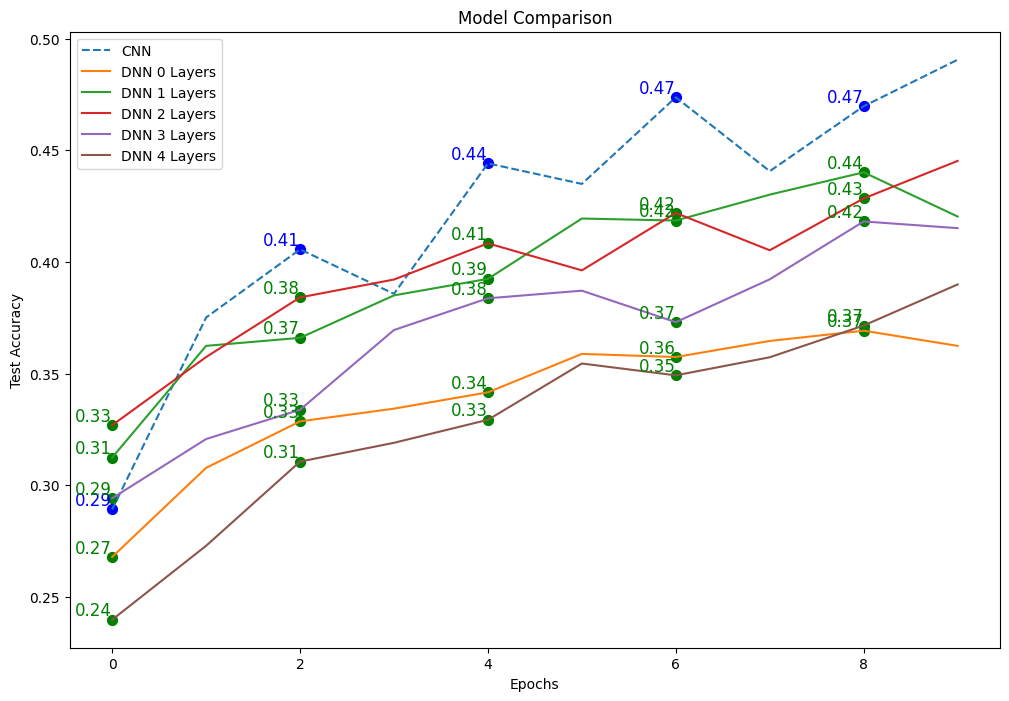

In [25]:
# Create a plot to compare model performances
plt.figure(figsize=(12, 8))
plt.title('Model Comparison')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')

# Plot CNN performance with points and labels
plt.plot(model_fit.epoch, model_fit.history['val_accuracy'], linestyle='--', label='CNN')
plt.scatter(model_fit.epoch[::2], model_fit.history['val_accuracy'][::2], s=50, c='blue', marker='o')
for i, acc in enumerate(model_fit.history['val_accuracy'][::2]):
    plt.text(model_fit.epoch[2*i], acc, f'{acc:.2f}', fontsize=12, ha='right', va='bottom', c='blue')

# Plot dense neural network performances with points and labels
for hidden_layers, history in zip(hidden_layers_list, histories):
    plt.plot(range(epochs), history.history['val_accuracy'], label=f'DNN {hidden_layers} Layers')
    plt.scatter(range(0, epochs, 2), history.history['val_accuracy'][::2], s=50, c='green', marker='o')
    for i, acc in enumerate(history.history['val_accuracy'][::2]):
        plt.text(2 * i, acc, f'{acc:.2f}', fontsize=12, ha='right', va='bottom', c='green')

plt.legend()
plt.show()



The CNN likely performed better than the shallow dense networks because the CNN can capture spatial hierachies and local patterns better.

The CNN is a deeper network with 18 layers in total whereas when the dense network had the following layers for each number of hidden layers set:

Dense (0 hidden layers) = 2 total layers
Dense (1 hidden layer) = 4 total layers
Dense (2 hidden layers) = 7 total layers
Dense (3 hidden layers) = 10 total layers
Dense (4 hidden layers) = 13 total layers

Few layers may not capture complex patterns in the data. Too many can lead to overfitting however this is unlikely the case with this CNN.

For the CNN, the dropout rate of 0.25 in the intial layer, and the next set of convolutional layers and max pooling is appropriate to prevent overfitting. However for the DNNs, 0.5 might be too high since the DNNs are relatively shallow and might be why the CNN performed better.

After only 10 epochs we don't see much convergence with the simple dense neural networks and the CNN.